# <a href="https://mipt-stats.gitlab.io/courses/ad_mipt.html">Phystech@DataScience</a>
## Задание 2

**Правила:**

* Выполненную работу нужно отправить телеграм-боту.
* Дедлайн **23 февраля в 15:00 (отбор)**. После дедлайна работы не принимаются кроме случаев наличия уважительной причины с подтверждающими документами.
* Прислать нужно ноутбук в формате `ipynb` 
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Публикация решения может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качествие основы, ничего не удаляя из него.

-----

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.3)

Рассмотрим данные исследования 2004 года о зависимости риска развития диабета от пола, возраста, индекса массы тела, среднего кровяного давления и других показателей. 

Функция `sklearn.datasets.load_diabetes()` возвращает словарь. В поле `data` записана матрица регрессоров, в которой данные предварительно центрированы и нормированы. В поле `target` записана мера прогрессирования заболевания в течении года. В поле `DESCR` можно прочитать подробнее о данных.

### Загрузка данных

In [2]:
data = load_diabetes()

Посмотрим на описание датасета.

In [3]:
print(data['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [4]:
data_frame = pd.DataFrame(data=data['data'])
data_frame

,0,1,2,3,4,5,6,7,8,9
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930


Поле `data` содержит матрицу размера 442 $\times$ 10, где 442 — количество пациентов, а 10 — количество признаков (возраст, пол, и т.д.). 
Строки матрицы соответствуют пациентам, столбцы — признакам.

In [5]:
data['data'].shape

(442, 10)

Целевая переменная $-$ мера прогрессирования заболевания в течении года.


In [6]:
data['target'].shape

(442,)

Создайте матрицу регрессоров $X$ и столбец наблюдений $y$.

In [7]:
X = data['data']
y = data['target']


### Обучение моделей

Разбейте данные случайно на две части — обучающую и тестовую в соотношении 80:20.

Если что-то забыли или что-то не понятно, можно почитать справку:

In [8]:
train_test_split?

Signature:
train_test_split(
    *arrays,
    test_size=None,
    train_size=None,
    random_state=None,
    shuffle=True,
    stratify=None,
)
Docstring:
Split arrays or matrices into random train and test subsets.

Quick utility that wraps input validation and
``next(ShuffleSplit().split(X, y))`` and application to input data
into a single call for splitting (and optionally subsampling) data in a
oneliner.

Read more in the :ref:`User Guide <cross_validation>`.

Parameters
----------
*arrays : sequence of indexables with same length / shape[0]
    Allowed inputs are lists, numpy arrays, scipy-sparse
    matrices or pandas dataframes.

test_size : float or int, default=None
    If float, should be between 0.0 and 1.0 and represent the proportion
    of the dataset to include in the test split. If int, represents the
    absolute number of test samples. If None, the value is set to the
    complement of the train size. If ``train_size`` is also None, it will
    be set to 0.25.

train

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True) 



Заведите модель линейной регрессии из `sklearn` и обучите ее по обучающей части данных.

In [10]:
model = LinearRegression(fit_intercept=True) 
model_trained = model.fit(X_train, y_train)

Выведите кооэффициенты модели, включая свободный член.

In [11]:
print('Свободный член: ', model_trained.intercept_, '\n', 'Остальные коэффициенты: ', model_trained.coef_)

Свободный член:  150.4439079690011 
 Остальные коэффициенты:  [ -18.6639321  -236.88149967  466.8860937   334.26713283 -591.88362588
  395.93449365 -116.60966954  -28.01537456  735.00242886   68.28882324]


Посчитайте предсказания построенной модели на тестовой выборке

In [12]:
y_pred = model_trained.predict(X_test)

Реализуйте метрики MSE, MAE, MAPE без использования `sklearn` и других готовых реализаций.

In [13]:
from functools import reduce

def mean_squared_error(y_true, y_pred):
    mse = 0    
    for y_t, y_p in zip(y_true, y_pred):
        mse += (y_t - y_p)**2
    return mse/y_true.size

def mean_absolute_error(y_true, y_pred):
    
    mae = 0
    for y_t, y_p in zip(y_true, y_pred):
        mae += abs(y_t - y_p)
    return mae/y_true.size


def mean_absolute_percentage_error(y_true, y_pred):
    mape = 0
    for y_t, y_p in zip(y_true, y_pred):
        mape += abs(y_t - y_p)/abs(y_t)
    return 100*mape/y_true.size

Посчитайте MSE, MAE, MAPE на тестовой выборке и выведите с точностью до трех знаков после запятой.

In [14]:
print('MSE: ', "%.3f" % mean_squared_error(y_test, y_pred))
print('MAE: ', "%.3f" % mean_absolute_error(y_test, y_pred))
print('MAPE: ', "%.0f" % mean_absolute_percentage_error(y_test, y_pred), '%')

MSE:  2822.649
MAE:  43.892
MAPE:  40 %


###Своя реализация модели

Теперь реализуем линейную регрессию самостоятельно, используя формулы с лекции.
Вам нужно только заполнить прочерки в методах `fit` и `predict`.

In [15]:
class MyLinearRegression:
    """
    Класс, реализующий линейную регрессию c помощью МНК.
    """
    
    def __init__(self):
        pass
        
    def fit(self, X, Y):
        """
        Функция обучения модели. 
        
        Предполагается модель Y = X * theta + epsilon. 
        где X --- регрессор (матрица размера n x d), 
        Y --- отклик (матрица размера n x 1),
        epsilon-ы имеют нормальное распределение

        Обратите внимание, здесь нет intercept_
        """
        
        self.n, self.d = X.shape
        
        A = np.linalg.inv((1/self.n) * (X.T)@X)
        
        B = (1/self.n)*(A@(X.T))
        
        
        self.theta = B@Y
        
  
        return self
    
        
    def predict(self, X):
        """
        Возвращает предсказание отклика на новых объектах X 
        и опционально доверительный/предсказательный интервал.
        
        X --- матрица объектов размера n x d
                        
        """
        
        y_pred_new = X@(self.theta)
        return y_pred_new

Обучите вашу модель на данных о диабете с добавлением свободного члена.
Распечатайте коэффициенты и сравните их с коэффициентами модели из `sklearn`.

In [16]:
X_train_intercept_true = np.roll(np.append(X_train.T, [np.ones(X_train.shape[0])], axis = 0).T, 1)


my_lin_reg_intercept_true = MyLinearRegression()

my_lin_reg_intercept_true.fit(X_train_intercept_true, y_train)

print('Свободный член: ', my_lin_reg_intercept_true.theta[0], '\n', 'Остальные коэффициенты: ', my_lin_reg_intercept_true.theta[1:])

Свободный член:  150.44390796899987 
 Остальные коэффициенты:  [ -18.6639321  -236.88149967  466.8860937   334.26713283 -591.88362588
  395.93449365 -116.60966954  -28.01537456  735.00242886   68.28882324]


Теперь обучите модель без свободного члена.

In [17]:
my_lin_reg_intercept_false = MyLinearRegression()

my_lin_reg_intercept_false.fit(X_train, y_train)

print('Коэффициенты без свободного члена: ', my_lin_reg_intercept_false.theta)

Коэффициенты без свободного члена:  [ 111.37572026 -303.18335394  481.75228053  300.28934909 -731.65110582
  542.10125133 -139.40128971 -160.36024447  924.11814148   71.73559061]


Сравните качество моделей со свободным членом и без него на тестовой выборке.

In [18]:
X_test_intercept_true = np.roll(np.append(X_test.T, [np.ones(X_test.shape[0])], axis = 0).T, 1)


y_pit = my_lin_reg_intercept_true.predict(X_test_intercept_true) #intercept_true
y_pif = my_lin_reg_intercept_false.predict(X_test) #intercept_false

In [19]:
print('MSE for model with independent term: ', "%.3f" % mean_squared_error(y_test, y_pit))
print('MAE for model with independent term: ', "%.3f" % mean_absolute_error(y_test, y_pit))
print('MAPE for model with independent term: ', "%.0f" % mean_absolute_percentage_error(y_test, y_pit), '%')
print('=============================================')
print('MSE for model without independent term: ', "%.3f" % mean_squared_error(y_test, y_pif))
print('MAE for model without independent term: ', "%.3f" % mean_absolute_error(y_test, y_pif))
print('MAPE for model without independent term: ', "%.0f" % mean_absolute_percentage_error(y_test, y_pif), '%')


MSE for model with independent term:  2822.649
MAE for model with independent term:  43.892
MAPE for model with independent term:  40 %
MSE for model without independent term:  28696.833
MAE for model without independent term:  160.898
MAPE for model without independent term:  129 %


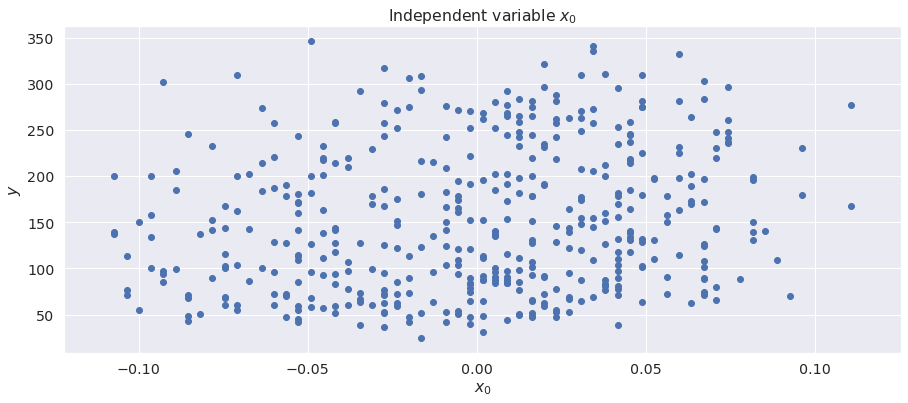

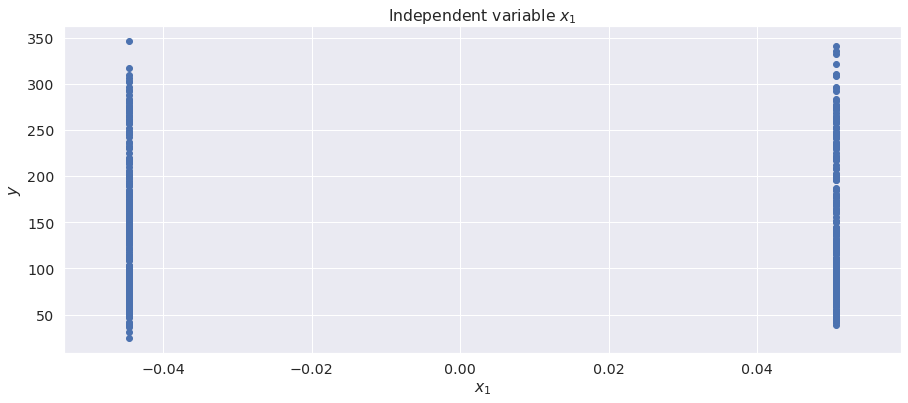

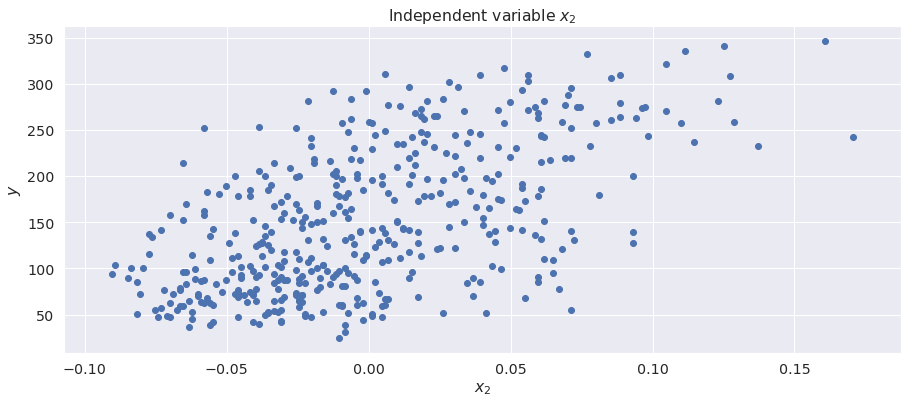

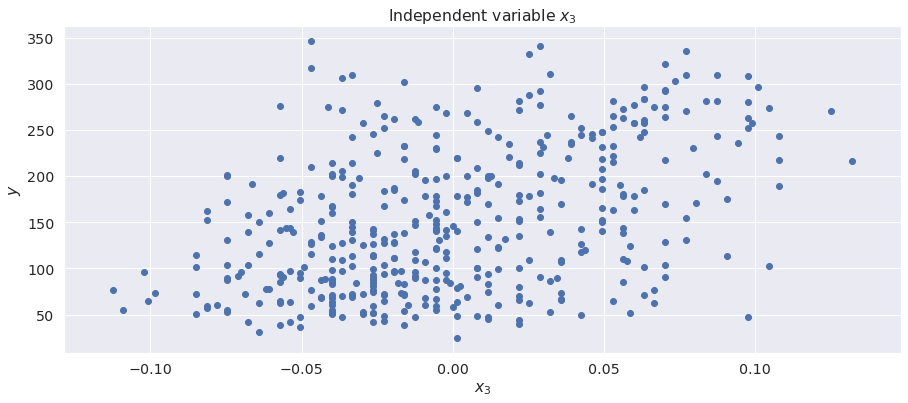

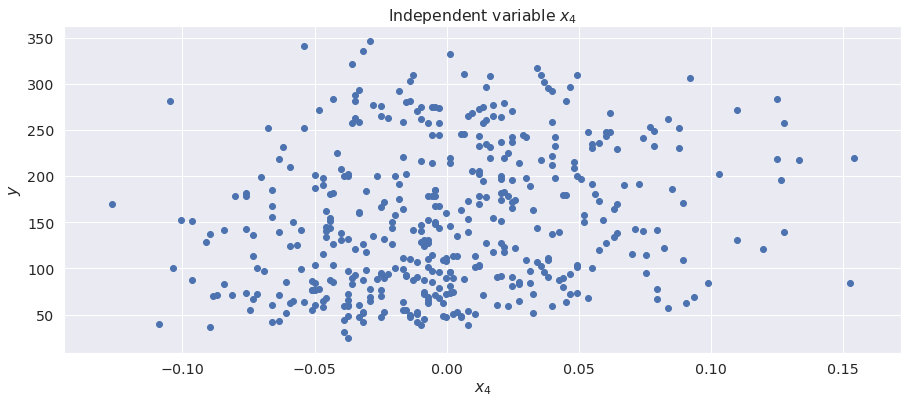

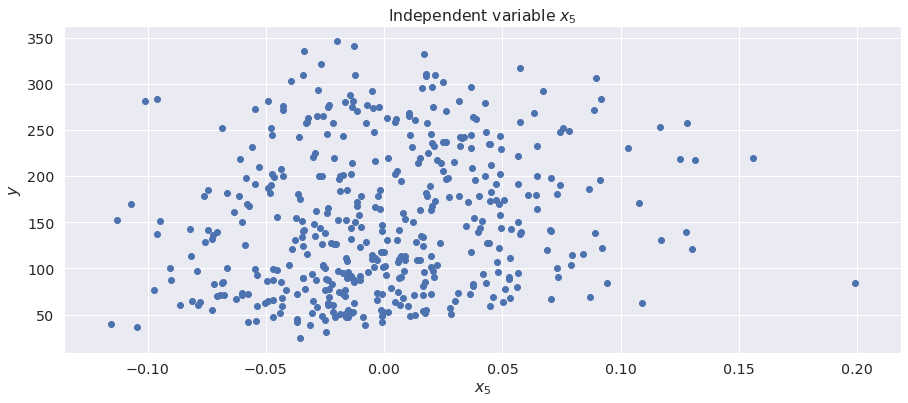

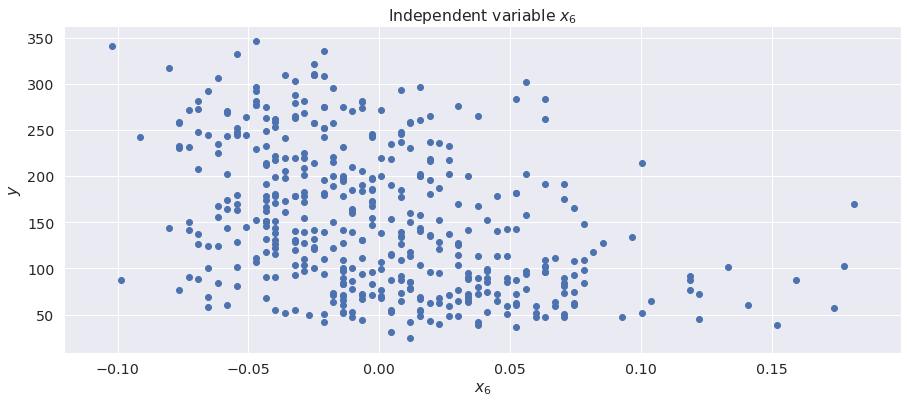

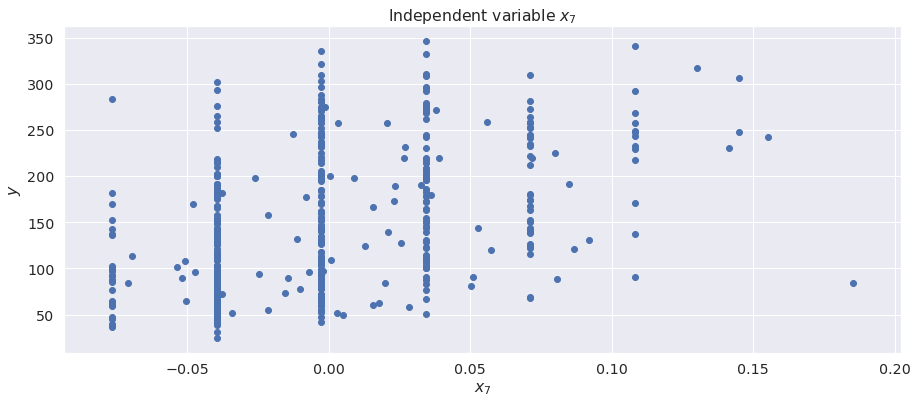

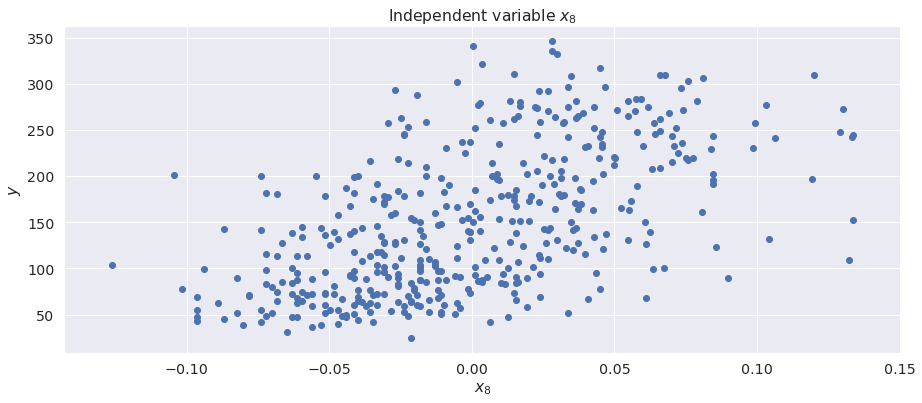

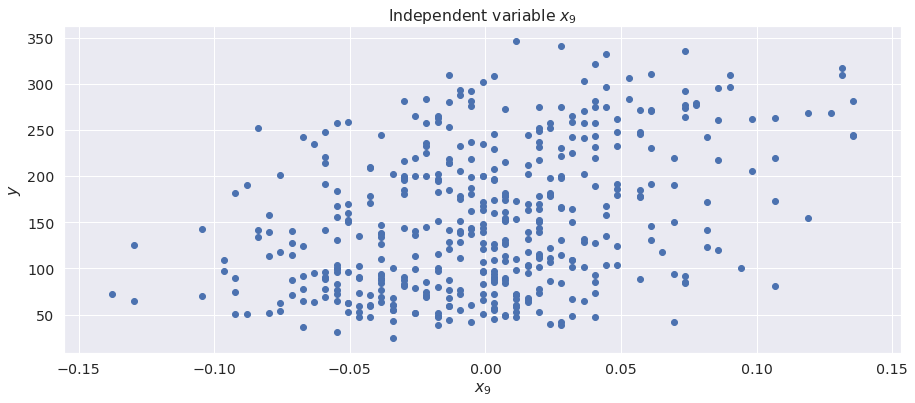

In [20]:
for i, x in enumerate(X.T):
    plt.figure(figsize=(15, 6))
    plt.scatter(x, y)

    plt.title(f'Independent variable $x_{i}$')
    plt.xlabel(f'$x_{i}$')
    plt.ylabel(f'$y$')
plt.show()


Сделайте выводы.

# Выводы

**По ходу решения задачи мы научились пользоваться библиотекой sklearn для построения линейной регрессионной модели. Написали собственный класс линейной регрессионной модели. Также мы написали различные метрики оценки качества для задач регрессии и сравнили их. На нашем датасете оценки оказались хоть и большими (что говорит о плохой линейности модели), но все таки модель без свободного члена показывает куда более плохие результаты. Значит, данные не центрированы.**